In [ ]:
import torch.nn as nn

# VGG11 architecture
class VGG11(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(VGG11, self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        # convolutional layers 
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        # linear layers
        self.linear_layers = nn.Sequential(
            nn.Linear(512, 4096), 
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 10),
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = torch.flatten(x, 1)
        x = self.linear_layers(x)
        return x

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
matplotlib.style.use('ggplot')
device = torch.device('cpu')

In [3]:
# Transforms: Resize from 28x28 to 32x32 for VGG input
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()
])

# Load datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [4]:
num_epochs = 10
model = VGG11().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses, test_losses,train_accuracies, test_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Progress bar
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    # for images, labels in train_loader:
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        loop.set_postfix(loss=running_loss/(total//64 + 1), acc=100.0 * correct / total)

    # ABCD Metrics
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {epoch_train_loss:.4f}, "
          f"Train Acc: {epoch_train_acc:.2%} | Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")


Epoch 1/10 — Train Loss: 0.4323, Train Acc: 84.84% | Test Loss: 0.1271, Test Acc: 96.64%


Epoch 2/10 — Train Loss: 0.1037, Train Acc: 97.73% | Test Loss: 0.0885, Test Acc: 98.08%


Epoch 3/10 — Train Loss: 0.0866, Train Acc: 98.17% | Test Loss: 0.0703, Test Acc: 98.57%


Epoch 4/10 — Train Loss: 0.0687, Train Acc: 98.61% | Test Loss: 0.0495, Test Acc: 99.08%


Epoch 5/10 — Train Loss: 0.0578, Train Acc: 98.71% | Test Loss: 0.0337, Test Acc: 99.31%


Epoch 6/10 — Train Loss: 0.0877, Train Acc: 98.46% | Test Loss: 0.0407, Test Acc: 99.16%


Epoch 7/10 — Train Loss: 0.0335, Train Acc: 99.21% | Test Loss: 0.0447, Test Acc: 99.33%


Epoch 8/10 — Train Loss: 0.0470, Train Acc: 98.97% | Test Loss: 0.0353, Test Acc: 99.19%


Epoch 9/10 — Train Loss: 0.0388, Train Acc: 99.17% | Test Loss: 0.0270, Test Acc: 99.43%


Epoch 10/10 — Train Loss: 0.0445, Train Acc: 99.29% | Test Loss: 0.1940, Test Acc: 96.98%


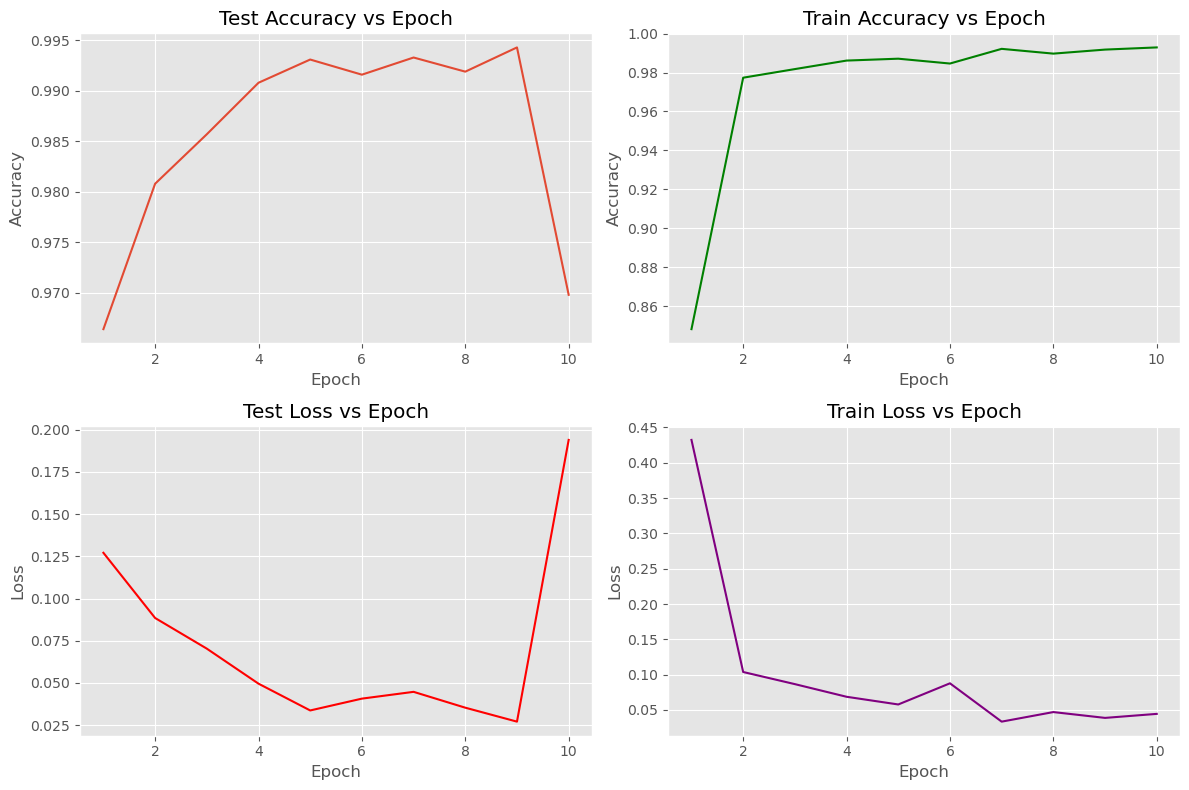

In [5]:
# Modified so can run after interupting (insted of set size 10)

import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(train_losses) + 1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy vs Epoch")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train Accuracy vs Epoch")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(epochs, test_losses, label="Test Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss vs Epoch")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(epochs, train_losses, label="Train Loss", color='purple')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss vs Epoch")
plt.grid(True)

plt.tight_layout()
plt.savefig("vgg11_1abcd.png")
plt.show()

In [6]:
# Transforms: Horizontal Flip
# ONLY TRANSFORM THE TEST, NOT TRAINING OTHERWISE TAKES A LONG TIME STUPID
transform_hori = transforms.Compose([
    transforms.Resize(32),
    torchvision.transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_hori)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [7]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")


Epoch 1/1 — Test Loss: 11.2534, Test Acc: 45.34%


In [8]:
# Transforms: Vertical Flip
transform_vert = transforms.Compose([
    transforms.Resize(32),
    torchvision.transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor()
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_vert)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [9]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")


Epoch 1/1 — Test Loss: 14.2725, Test Acc: 36.90%


In [10]:
# Transforms: Noise (0.01)
transform_noise = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x : x + 0.01*torch.randn_like(x))
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [11]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")


Epoch 1/1 — Test Loss: 0.1914, Test Acc: 97.03%


In [12]:
# Transforms: Noise (0.1)
transform_noise = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x))
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [13]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 0.2005, Test Acc: 96.02%


In [14]:
# Transforms: Noise (1)
transform_noise = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x : x + 1*torch.randn_like(x))
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [15]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 5.5769, Test Acc: 18.87%


In [ ]:
# Now we will implement the augmentation (and hopefullt get better results)
# Augmentation is to rotate the images 
# (logic behind this is that handwritting is not always perfectly alligned so it makes sense in the real world)
# Each image will be replaced by images rotated both ways 20 degrees
# Let's see how it affects the output

class Rotato(torch.utils.data.Dataset):
    def __init__(self, base_dataset, angles=[-20, 20], transform=None):
        self.base_dataset = base_dataset
        self.angles = angles
        self.transform = transform

    def __len__(self):
        return len(self.base_dataset) * len(self.angles)

    def __getitem__(self, idx):
        base_idx = idx // len(self.angles)
        angle_idx = idx % len(self.angles)

        img, label = self.base_dataset[base_idx]

        angle = self.angles[angle_idx]
        img = img.rotate(angle)

        if self.transform:
            img = self.transform(img)

        return img, label

In [17]:
# Transforms: Resize from 28x28 to 32x32 for VGG input
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()
])

# Load datasets
base_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
train_dataset = Rotato(base_train_dataset, angles=[-10, 10], transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [18]:
num_epochs = 10
model = VGG11().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses, test_losses,train_accuracies, test_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Progress bar
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    # for images, labels in train_loader:
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        loop.set_postfix(loss=running_loss/(total//64 + 1), acc=100.0 * correct / total)

    # ABCD Metrics
    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_acc = correct / total
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Train Loss: {epoch_train_loss:.4f}, "
          f"Train Acc: {epoch_train_acc:.2%} | Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")


Epoch 1/10 — Train Loss: 0.2766, Train Acc: 91.57% | Test Loss: 0.1020, Test Acc: 97.99%


Epoch 2/10 — Train Loss: 0.1022, Train Acc: 97.81% | Test Loss: 0.0307, Test Acc: 99.25%


Epoch 3/10 — Train Loss: 0.0680, Train Acc: 98.50% | Test Loss: 0.0386, Test Acc: 99.25%


Epoch 4/10 — Train Loss: 0.0510, Train Acc: 98.85% | Test Loss: 0.0462, Test Acc: 99.16%


Epoch 5/10 — Train Loss: 0.0544, Train Acc: 98.87% | Test Loss: 0.0562, Test Acc: 98.77%


Epoch 6/10 — Train Loss: 0.0503, Train Acc: 98.95% | Test Loss: 0.0621, Test Acc: 98.80%


Epoch 7/10 — Train Loss: 0.0394, Train Acc: 99.12% | Test Loss: 0.0324, Test Acc: 99.54%


Epoch 8/10 — Train Loss: 0.0296, Train Acc: 99.31% | Test Loss: 0.0221, Test Acc: 99.51%


Epoch 9/10 — Train Loss: 0.0342, Train Acc: 99.26% | Test Loss: 0.0293, Test Acc: 99.35%


Epoch 10/10 — Train Loss: 0.0250, Train Acc: 99.40% | Test Loss: 0.0280, Test Acc: 99.41%


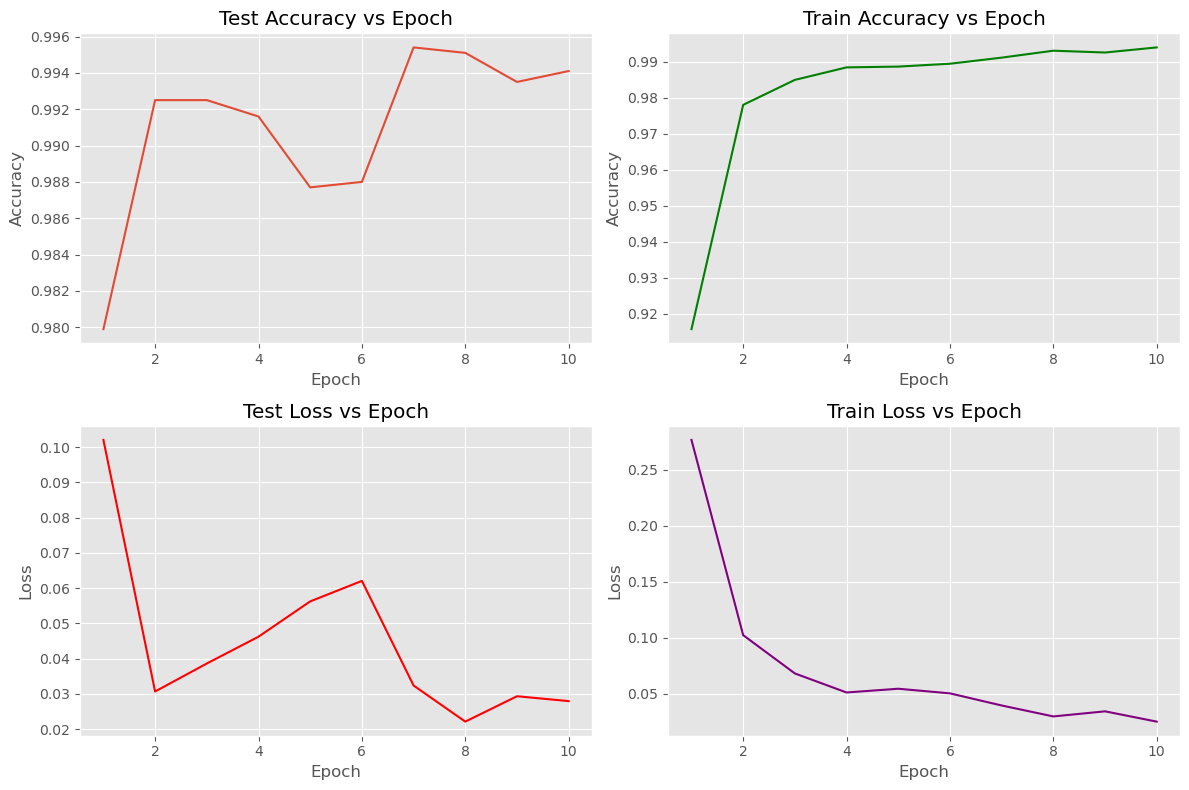

In [19]:
# Modified so can run after interupting (insted of set size 10)

import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(train_losses) + 1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy vs Epoch")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train Accuracy vs Epoch")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(epochs, test_losses, label="Test Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss vs Epoch")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(epochs, train_losses, label="Train Loss", color='purple')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss vs Epoch")
plt.grid(True)

plt.tight_layout()
plt.savefig("vgg11_41abcd.png")
plt.show()

In [20]:
# Transforms: Horizontal Flip
transform_hori = transforms.Compose([
    transforms.Resize(32),
    torchvision.transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_hori)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [21]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 6.2758, Test Acc: 37.82%


In [22]:
# Transforms: Vertical Flip
transform_vert = transforms.Compose([
    transforms.Resize(32),
    torchvision.transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor()
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_vert)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [23]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 7.1676, Test Acc: 38.78%


In [24]:
# Transforms: Noise (0.01)
transform_noise = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x : x + 0.01*torch.randn_like(x))
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [25]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 0.0277, Test Acc: 99.40%


In [26]:
# Transforms: Noise (0.1)
transform_noise = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x : x + 0.1*torch.randn_like(x))
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [27]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 0.0380, Test Acc: 99.03%


In [28]:
# Transforms: Noise (1)
transform_noise = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    torchvision.transforms.Lambda(lambda x : x + 1*torch.randn_like(x))
])

# Load datasets
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_noise)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [29]:
num_epochs = 1
criterion = nn.CrossEntropyLoss()

test_losses, test_accuracies = [], []

for epoch in range(num_epochs):
    # Test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_test_loss = test_loss / len(test_loader)
    epoch_test_acc = correct / total
    test_losses.append(epoch_test_loss)
    test_accuracies.append(epoch_test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} — Test Loss: {epoch_test_loss:.4f}, "
          f"Test Acc: {epoch_test_acc:.2%}")

Epoch 1/1 — Test Loss: 17.2292, Test Acc: 10.14%
